#Data Visualization

#LAB 5&6

In [99]:
import pandas as pd
import plotly.express as px
from sklearn.datasets import load_iris
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt

##Part 1

In [100]:
# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

In [101]:
# Scatter plot matrix
fig = px.scatter_matrix(iris_df, dimensions=iris_df.columns[:-1], color='species')
fig.show()

In [102]:
# Box plots for each feature grouped by species
fig2 = px.box(iris_df, x='species', y=iris_df.columns[:-1], title='Box Plots of Features Grouped by Species', points='all')
fig2.update_layout(yaxis_title='Feature Value', xaxis_title='Species')
fig2.show()

In [103]:
# Violin plots for each feature grouped by species
fig3 = px.violin(iris_df, x='species', y=iris_df.columns[:-1], title='Violin Plots of Features Grouped by Species', box=True, points='all')
fig3.update_layout(yaxis_title='Feature Value', xaxis_title='Species')
fig3.show()

In [104]:
# Strip plot for each feature grouped by species
fig4 = px.strip(iris_df, x='species', y=iris_df.columns[:-1], title='Strip Plot of Features Grouped by Species', color='species')
fig4.update_layout(yaxis_title='Feature Value', xaxis_title='Species')
fig4.show()

##Part 2

In [105]:
# Standardize features
X = StandardScaler().fit_transform(iris.data)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [106]:
# Train Support Vector Classifier
svm = SVC(kernel='linear')
svm.fit(X_pca, iris.target)

SVC(kernel='linear')

In [107]:
# Plot decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
fig = go.Figure()

# Plot data points
for i in range(3):
    indices = iris.target == i
    fig.add_trace(go.Scatter(x=X_pca[indices, 0], y=X_pca[indices, 1],
                             mode='markers', name=iris.target_names[i]))

# Plot decision boundary
fig.add_trace(go.Contour(x=np.arange(x_min, x_max, 0.02), y=np.arange(y_min, y_max, 0.02),
                          z=Z, showscale=False, colorscale='Viridis'))

fig.show()

In [108]:
# Predict the classes
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


From above we can clearly say Class Setosa and Class Versicolor are linearly separable and also Class Setosa and Class Virginica are linearly separable.

##Part 3

In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
# Load Wine dataset
wine_df = pd.read_csv('/content/drive/MyDrive/Data Visualization /WineQT.csv')

In [111]:
# Histogram of Alcohol content
fig1 = go.Figure(data=[go.Histogram(x=wine_df['alcohol'])])
fig1.update_layout(title_text='Distribution of Alcohol Content')
fig1.show()

In [112]:
# Box plot of Alcohol content by Wine Type
fig2 = go.Figure()
for wine_type in wine_df['Id'].unique():
    data = wine_df[wine_df['Id'] == wine_type]['alcohol']
    fig2.add_trace(go.Box(y=data, name=f'Wine Type {wine_type}'))
fig2.update_layout(title='Alcohol Content by Wine Type')
fig2.show()

In [113]:
# Scatter plot of Total Sulfur Dioxide vs Sulphates colored by Wine Type
fig3 = go.Figure()
for wine_type in wine_df['Id'].unique():
    data = wine_df[wine_df['Id'] == wine_type]
    fig3.add_trace(go.Scatter(x=data['total sulfur dioxide'], y=data['sulphates'], mode='markers', name=f'Wine Type {wine_type}'))
fig3.update_layout(title='Total Sulfur Dioxide vs Sulphates', xaxis_title='Total Sulfur Dioxide', yaxis_title='Sulphates')
fig3.show()

In [114]:
# Parallel Coordinates plot
fig4 = go.Figure(data=go.Parcoords(
    line = dict(color = wine_df['Id'],
                colorscale = 'Viridis',
                showscale = True,
                reversescale = True,
                ),
    dimensions = list([
        dict(range = [wine_df[col].min(), wine_df[col].max()],
             label = col, values = wine_df[col]) for col in wine_df.columns[1:-3]]
    )
))
fig4.update_layout(title='Parallel Coordinates Plot')

fig4.show()

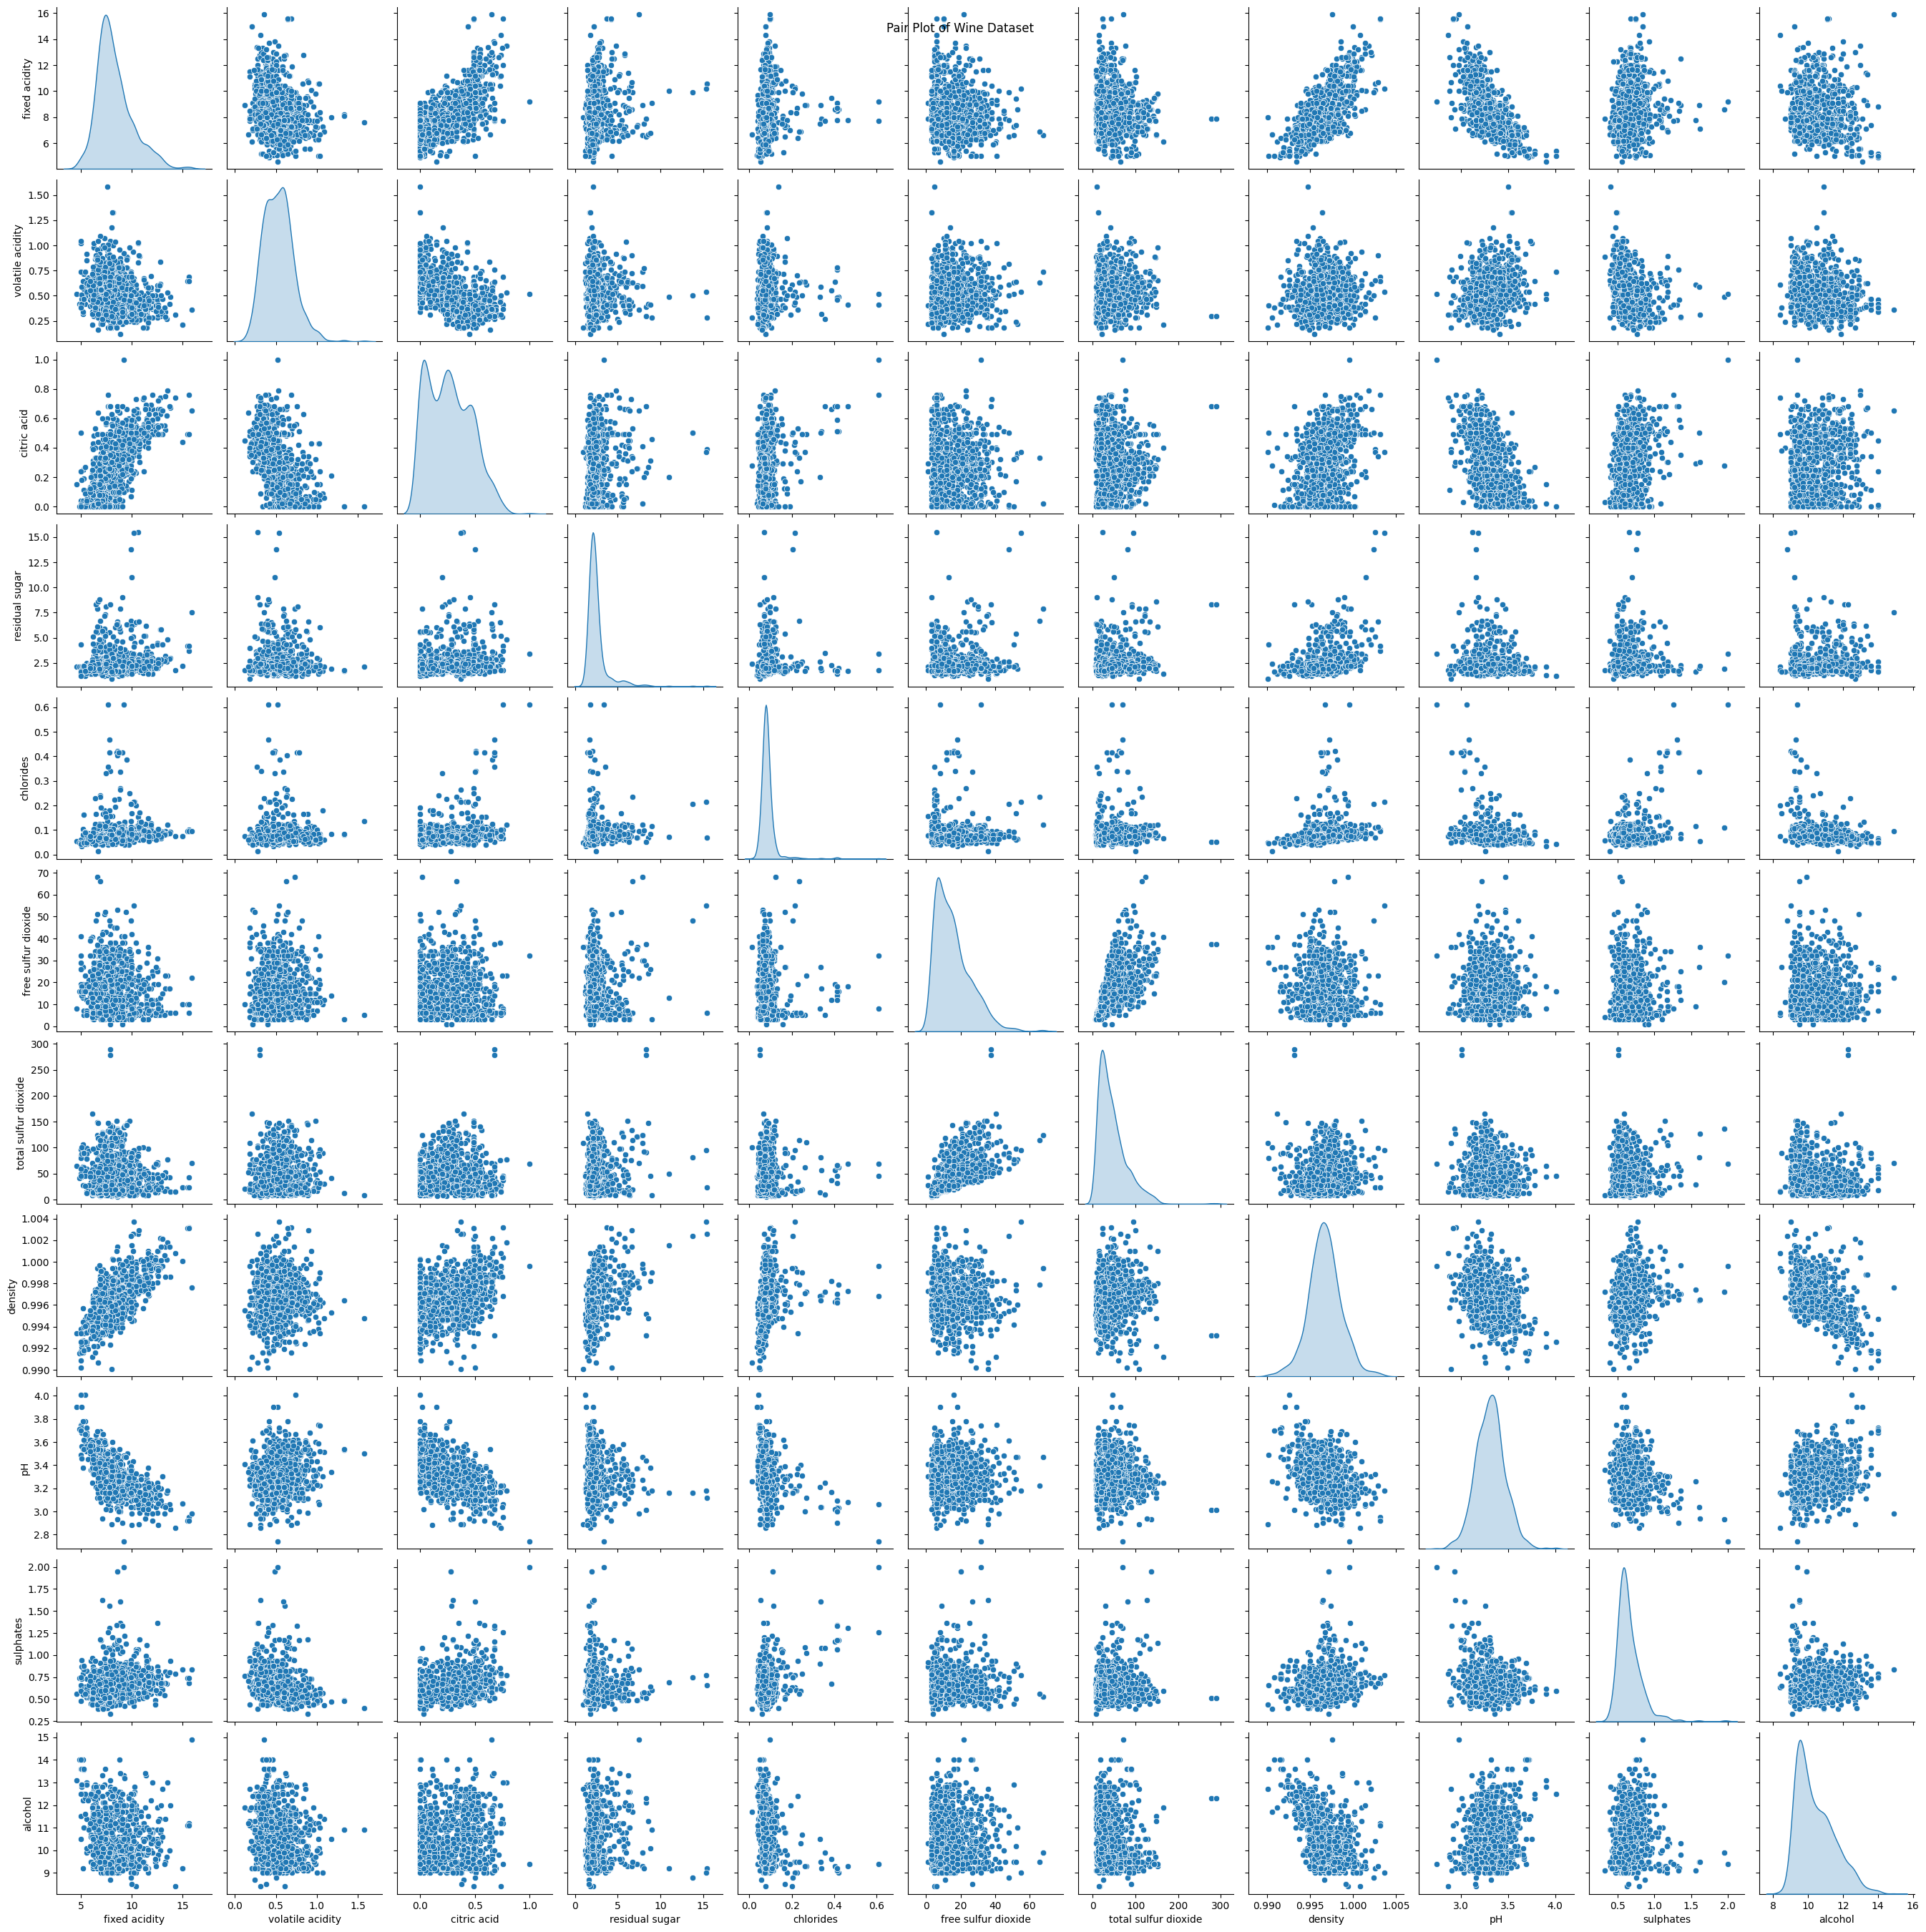

In [115]:
# Pairplot
sns.pairplot(wine_df, vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                            'pH', 'sulphates', 'alcohol'], diag_kind='kde')

plt.suptitle('Pair Plot of Wine Dataset')
plt.show()

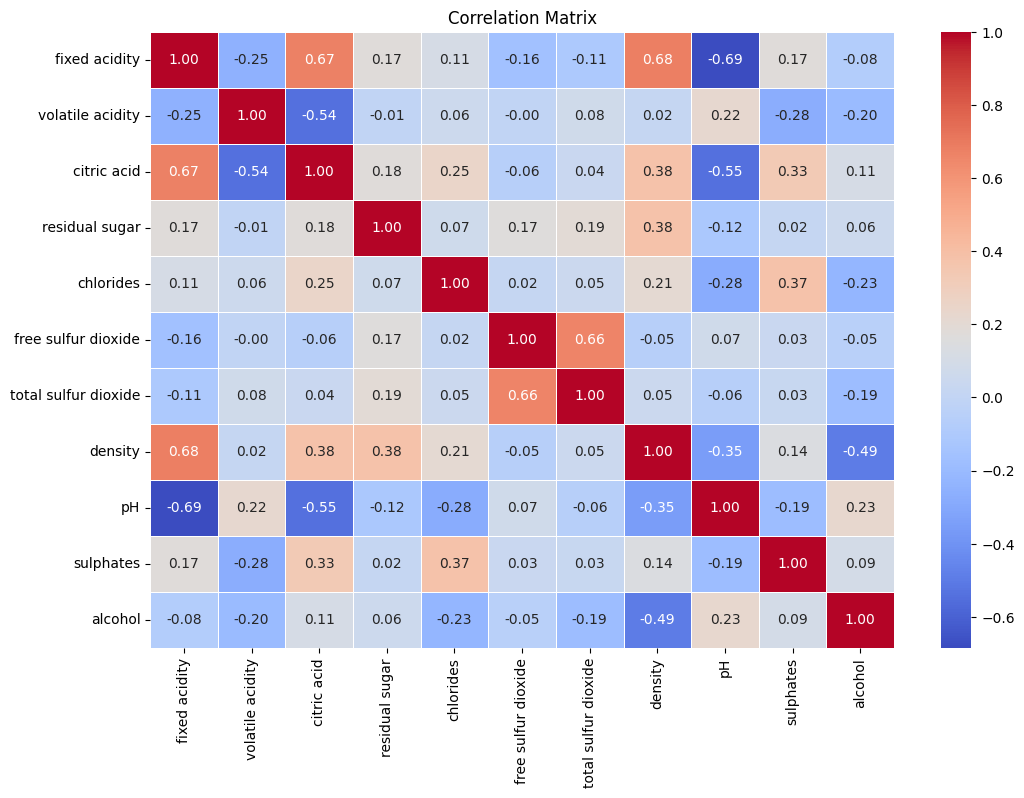

In [116]:
# Correlation matrix
correlation_matrix = wine_df.drop(columns=['Id', 'quality']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()